# Examples of multi-panel plotting using gridplot.

In [1]:
import numpy as np
from edge_pydb import EdgeTable
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from edge_pydb.plotting import gridplot

In [2]:
sspcols  = ['Name','ix','iy','sigstar','fe_medflx']
fluxcols = ['Name','ix','iy','flux_[OIII]5007','flux_Hbeta','flux_Halpha',
            'flux_[NII]6583','EW_Halpha','flux_sigsfr0','e_flux_sigsfr0',
            'flux_sigsfr_corr','flux_sigsfr_adopt','BPT','ZOH']

fluxtab = EdgeTable('edge_carma.pipe3d.hdf5', path='flux_elines', cols=fluxcols)
ssptab  = EdgeTable('edge_carma.pipe3d.hdf5', path='SSP', cols=sspcols)
print('Working on full EDGE database')

# consolidate the tables and calculate sSFR
fluxtab.join(ssptab, keys=['Name', 'ix', 'iy'])
fluxtab['specSFR'] = fluxtab['flux_sigsfr0'].quantity/fluxtab['sigstar'].quantity
# Halpha EW image values are negative
fluxtab['EW_Halpha'] = -fluxtab['EW_Halpha']
print(fluxtab.colnames)

Working on full EDGE database
['Name', 'ix', 'iy', 'flux_[OIII]5007', 'flux_Hbeta', 'flux_Halpha', 'flux_[NII]6583', 'EW_Halpha', 'flux_sigsfr0', 'e_flux_sigsfr0', 'flux_sigsfr_corr', 'flux_sigsfr_adopt', 'BPT', 'ZOH', 'sigstar', 'fe_medflx', 'specSFR']


/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [3]:
gallist = list(np.unique(fluxtab['Name']))
print(gallist)

['ARP220', 'IC0480', 'IC0540', 'IC0944', 'IC1151', 'IC1199', 'IC1683', 'IC2247', 'IC2487', 'IC4566', 'IC5376', 'NGC0444', 'NGC0447', 'NGC0477', 'NGC0496', 'NGC0523', 'NGC0528', 'NGC0551', 'NGC1167', 'NGC2253', 'NGC2347', 'NGC2410', 'NGC2480', 'NGC2487', 'NGC2623', 'NGC2639', 'NGC2730', 'NGC2880', 'NGC2906', 'NGC2916', 'NGC2918', 'NGC3303', 'NGC3381', 'NGC3687', 'NGC3811', 'NGC3815', 'NGC3994', 'NGC4047', 'NGC4149', 'NGC4185', 'NGC4210', 'NGC4211NED02', 'NGC4470', 'NGC4644', 'NGC4676A', 'NGC4711', 'NGC4961', 'NGC5000', 'NGC5016', 'NGC5056', 'NGC5205', 'NGC5218', 'NGC5394', 'NGC5406', 'NGC5480', 'NGC5485', 'NGC5520', 'NGC5614', 'NGC5633', 'NGC5657', 'NGC5682', 'NGC5732', 'NGC5784', 'NGC5876', 'NGC5908', 'NGC5930', 'NGC5934', 'NGC5947', 'NGC5953', 'NGC5980', 'NGC6004', 'NGC6021', 'NGC6027', 'NGC6060', 'NGC6063', 'NGC6081', 'NGC6125', 'NGC6146', 'NGC6155', 'NGC6168', 'NGC6186', 'NGC6301', 'NGC6310', 'NGC6314', 'NGC6361', 'NGC6394', 'NGC6478', 'NGC7738', 'NGC7819', 'UGC00809', 'UGC03253', '

## Example of adjusting grid size.  Note that a larger font size selected.

Plotting column flux_[NII]6583 for 2 galaxies
Plotting NGC4047 to NGC5614
NGC4047 Default x limits used: [1, 76]
NGC4047 Default y limits used: [2, 71]


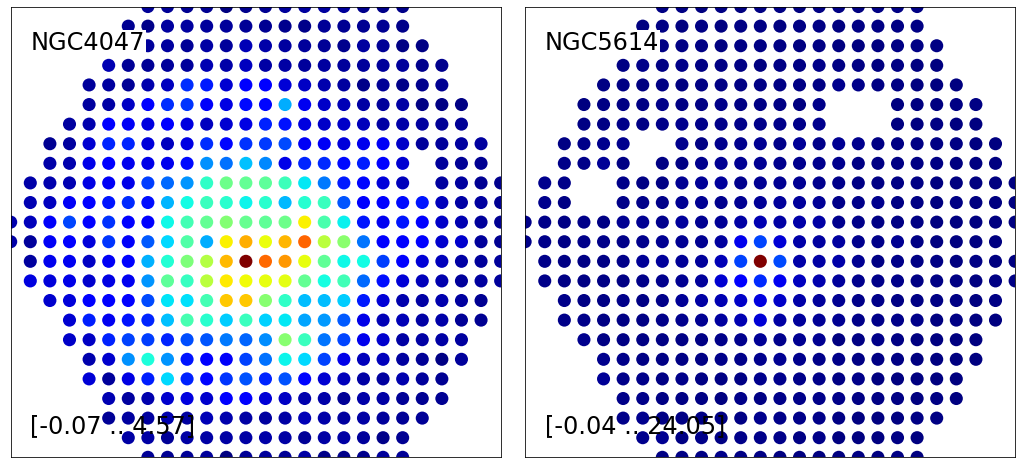

In [4]:
plt.rcParams.update({'font.size': 24})
gridplot(edgetab=fluxtab, gallist=['NGC4047', 'NGC5614'], columnlist=['flux_[NII]6583'],
         plotstyle='dot', pad=9, vshow=True, nx=2, ny=1)

## Examples of plotting multiple columns for one galaxy.

Plotting 14 columns for galaxy NGC4047
Plotting flux_[OIII]5007 to specSFR
flux_[OIII]5007 Default x limits used: [1, 76]
flux_[OIII]5007 Default y limits used: [2, 71]


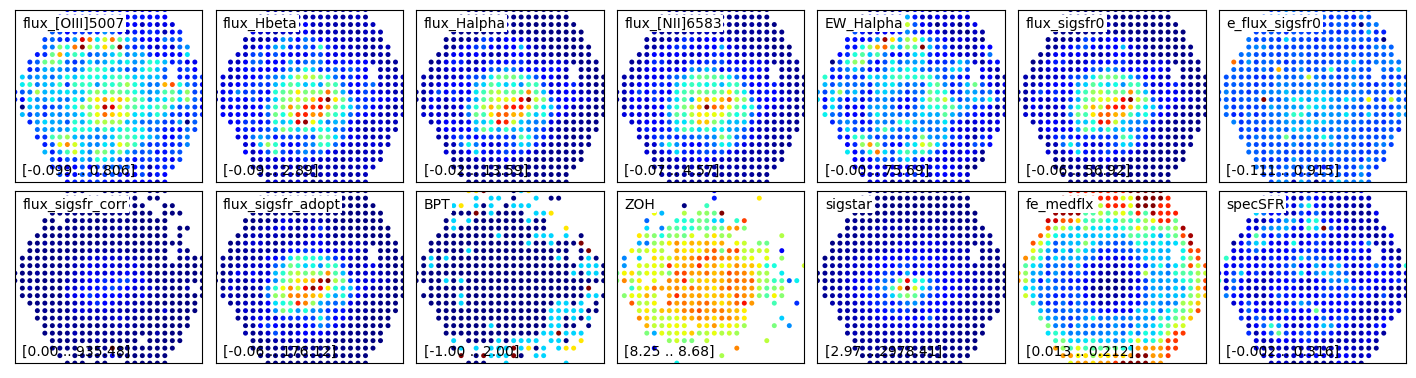

In [5]:
plt.rcdefaults()
gridplot(edgetab=fluxtab, gallist='NGC4047', plotstyle='dot', vshow=True)

Plotting 14 columns for galaxy NGC4047
Plotting flux_[OIII]5007 to specSFR
flux_[OIII]5007 Default x limits used: [0, 25]
flux_[OIII]5007 Default y limits used: [0, 23]


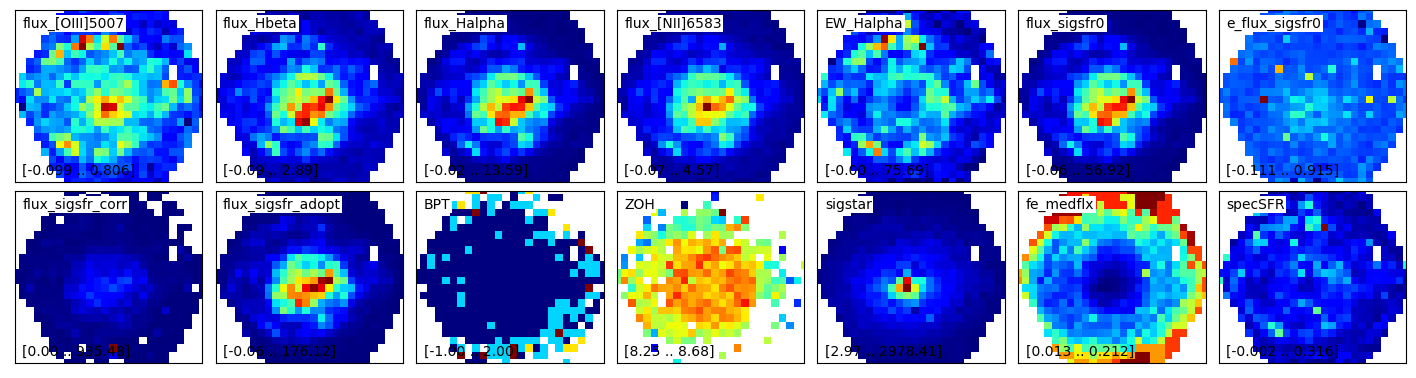

In [6]:
gridplot(edgetab=fluxtab, gallist='NGC4047', plotstyle='image', vshow=True)

Plotting 14 columns for galaxy NGC4047
Plotting flux_[OIII]5007 to specSFR


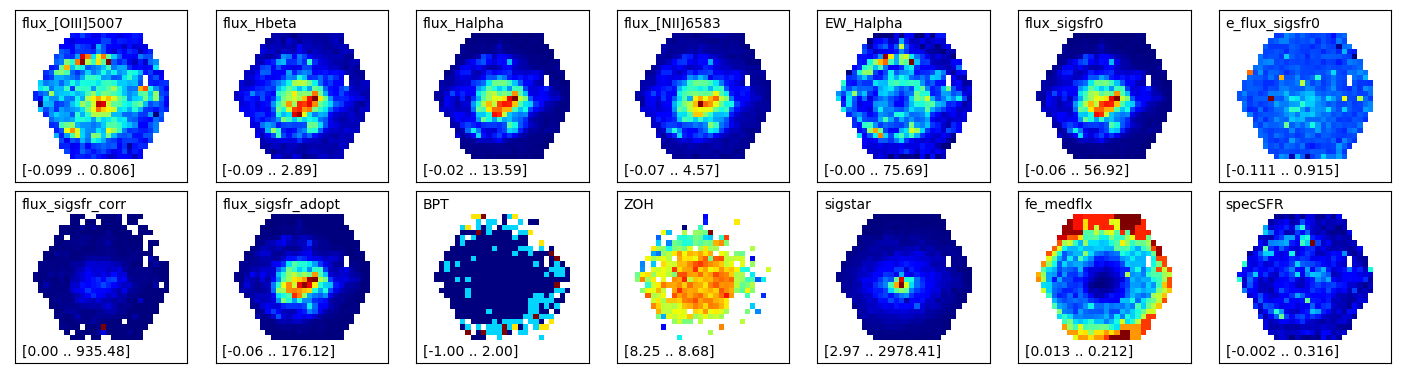

In [7]:
gridplot(edgetab=fluxtab, gallist='NGC4047', plotstyle='image', vshow=True, xrange=[-4,29], yrange=[-5,28])

## SFR map without extinction correction.  Color scale set per galaxy.

Plotting column flux_sigsfr0 for 125 galaxies
Plotting ARP220 to NGC4211NED02
ARP220 Default x limits used: [0, 25]
ARP220 Default y limits used: [0, 23]


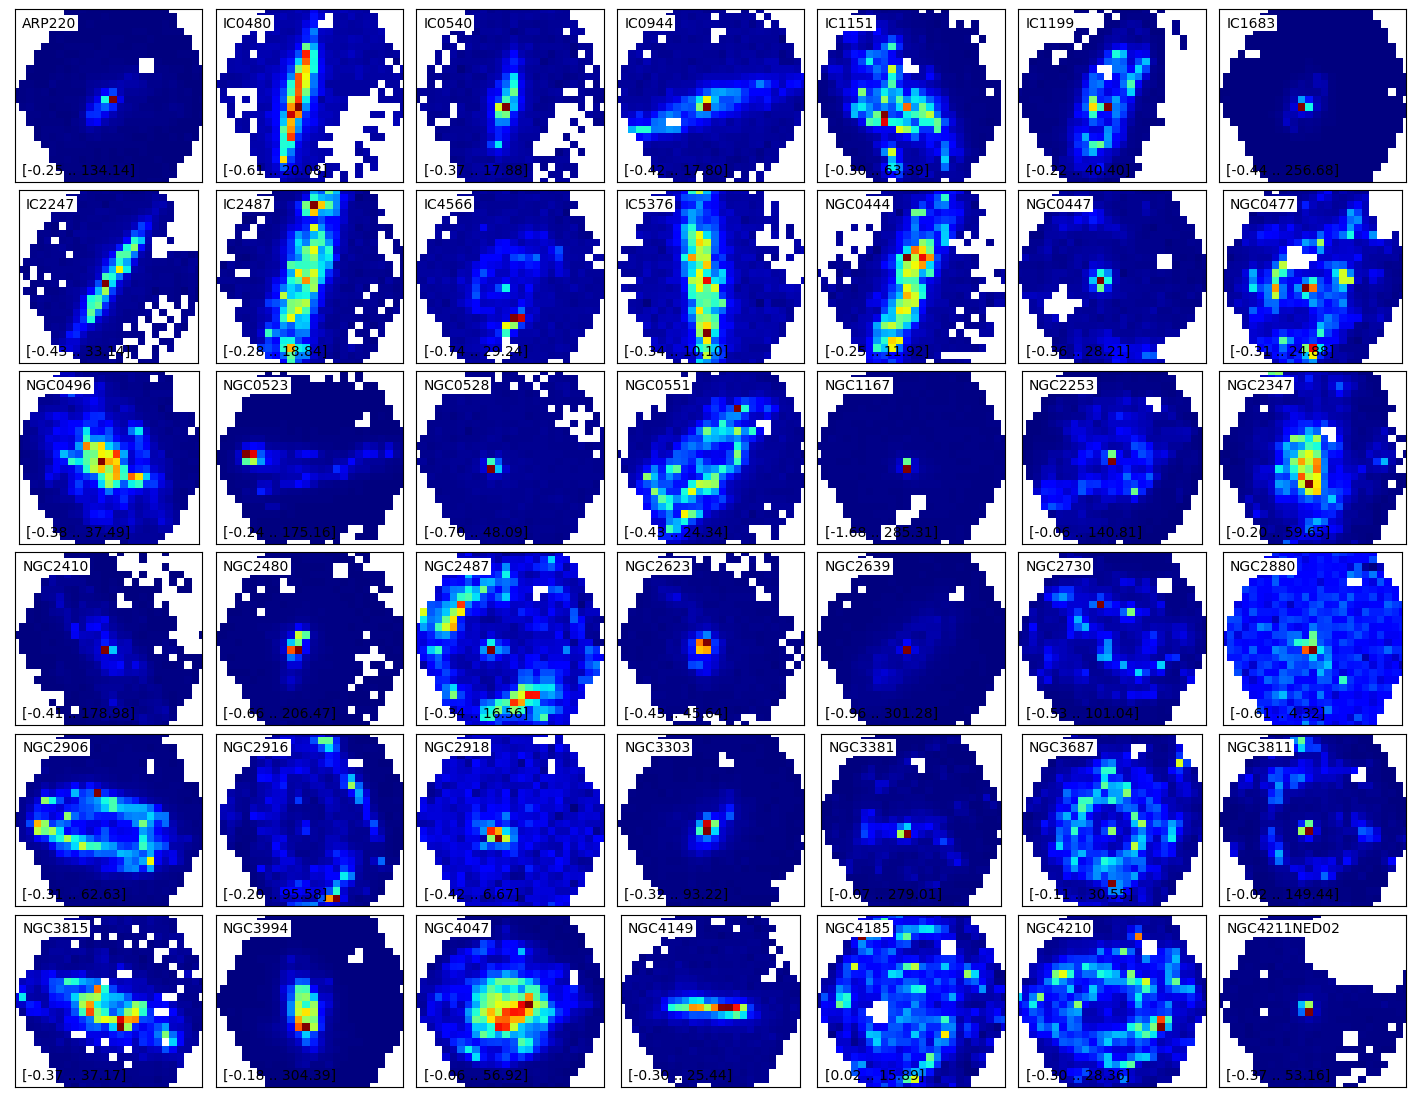

Plotting NGC4470 to NGC6314
NGC4470 Default x limits used: [0, 25]
NGC4470 Default y limits used: [0, 23]


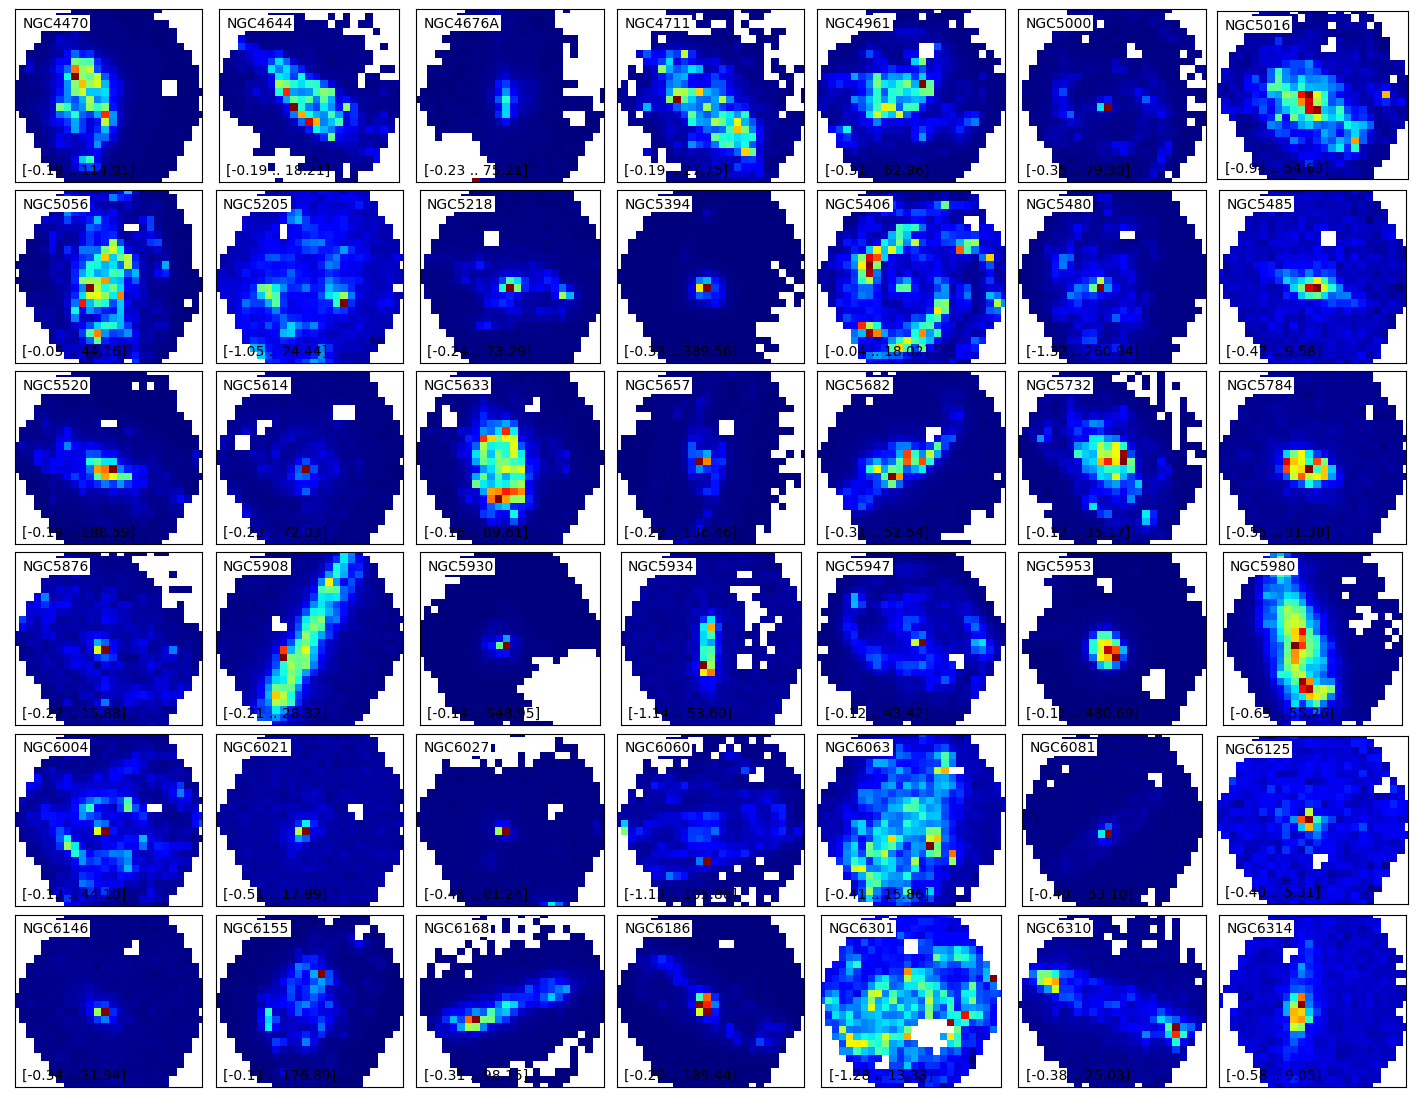

Plotting NGC6361 to UGC10710
NGC6361 Default x limits used: [0, 25]
NGC6361 Default y limits used: [0, 23]


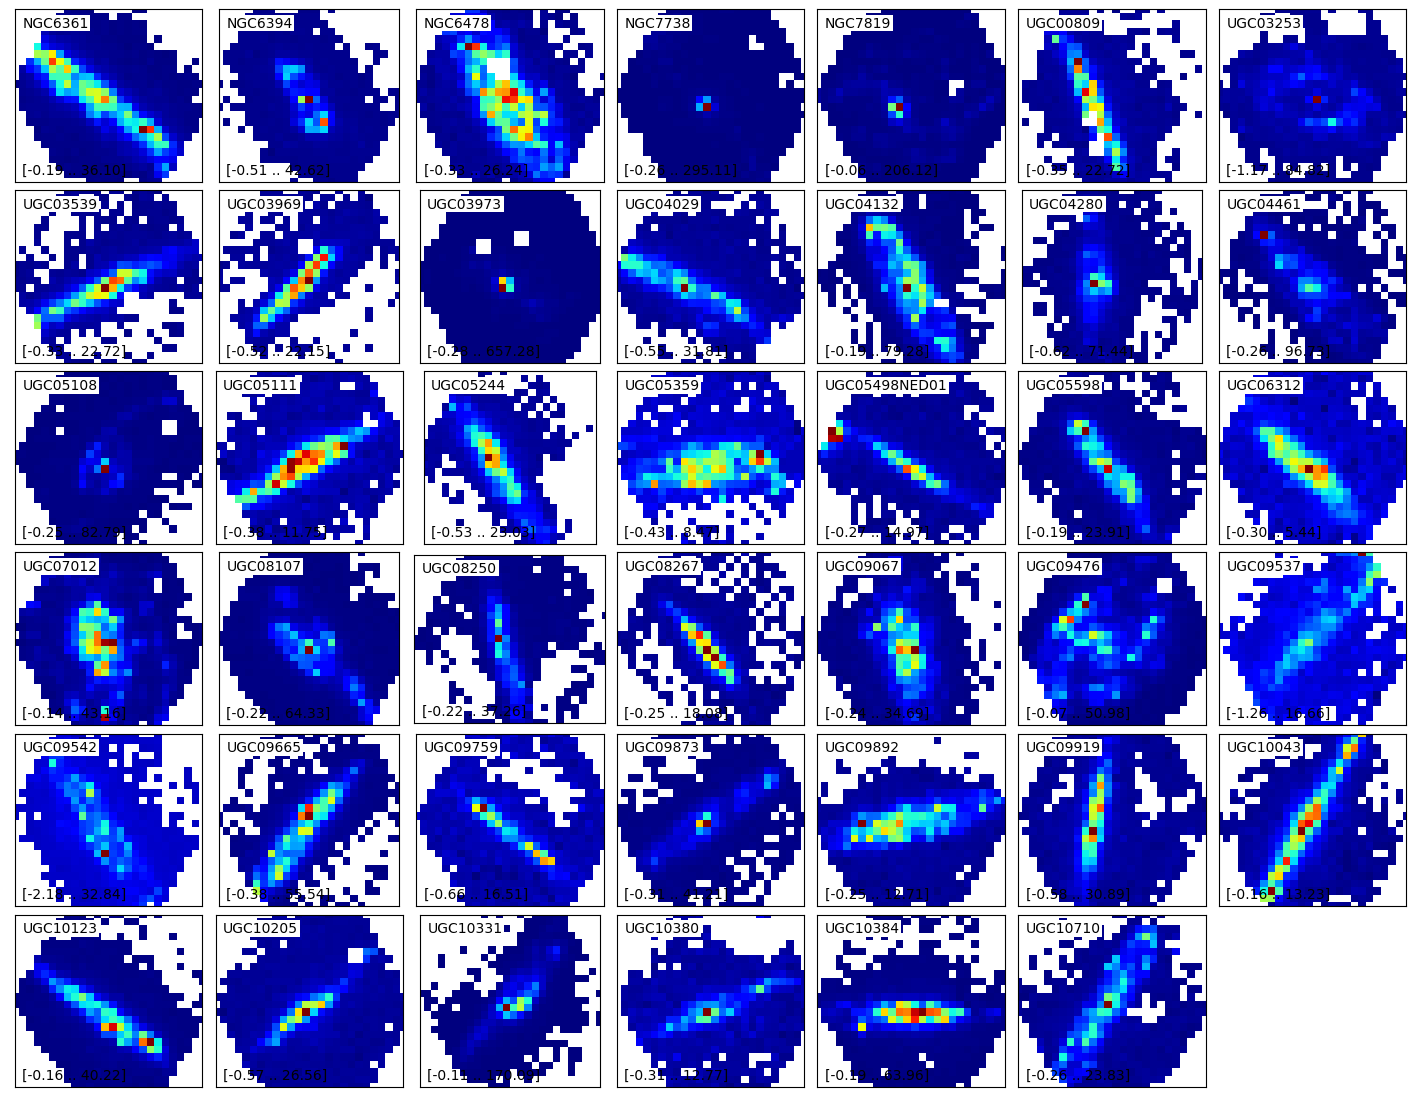

In [8]:
gridplot(edgetab=fluxtab, gallist=gallist, columnlist='flux_sigsfr0', plotstyle='image', vshow=True)

## SFR map without extinction correction.  Color scale and plot limits fixed for all galaxies.

Plotting column flux_sigsfr0 for 125 galaxies
Plotting ARP220 to NGC4211NED02


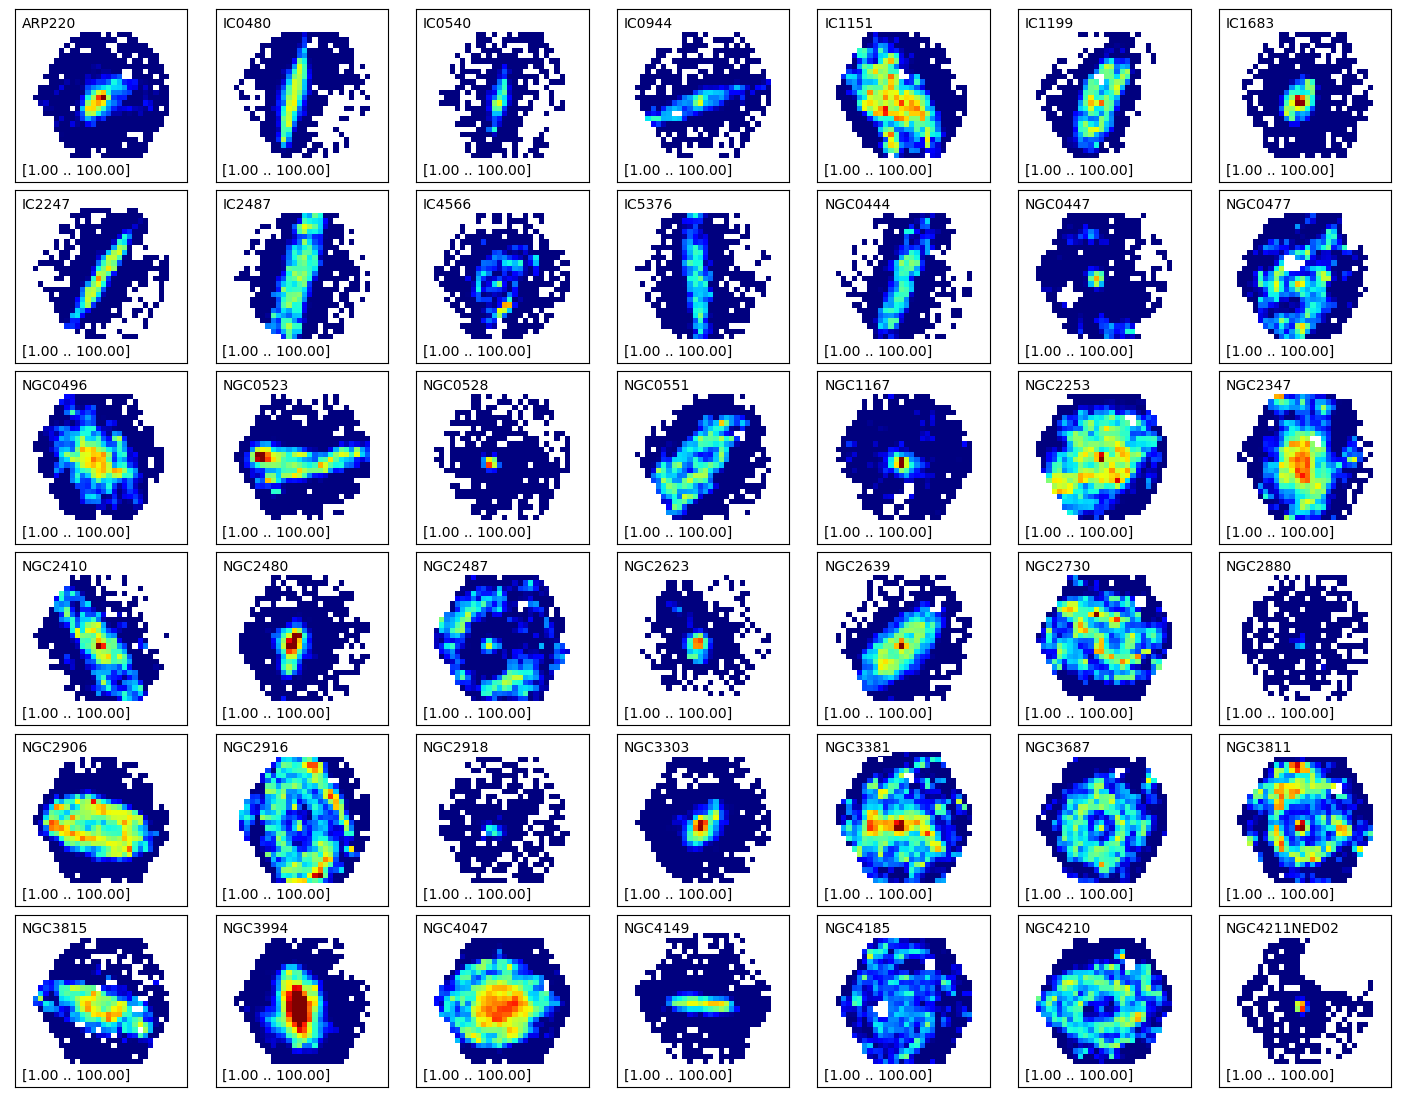

Plotting NGC4470 to NGC6314


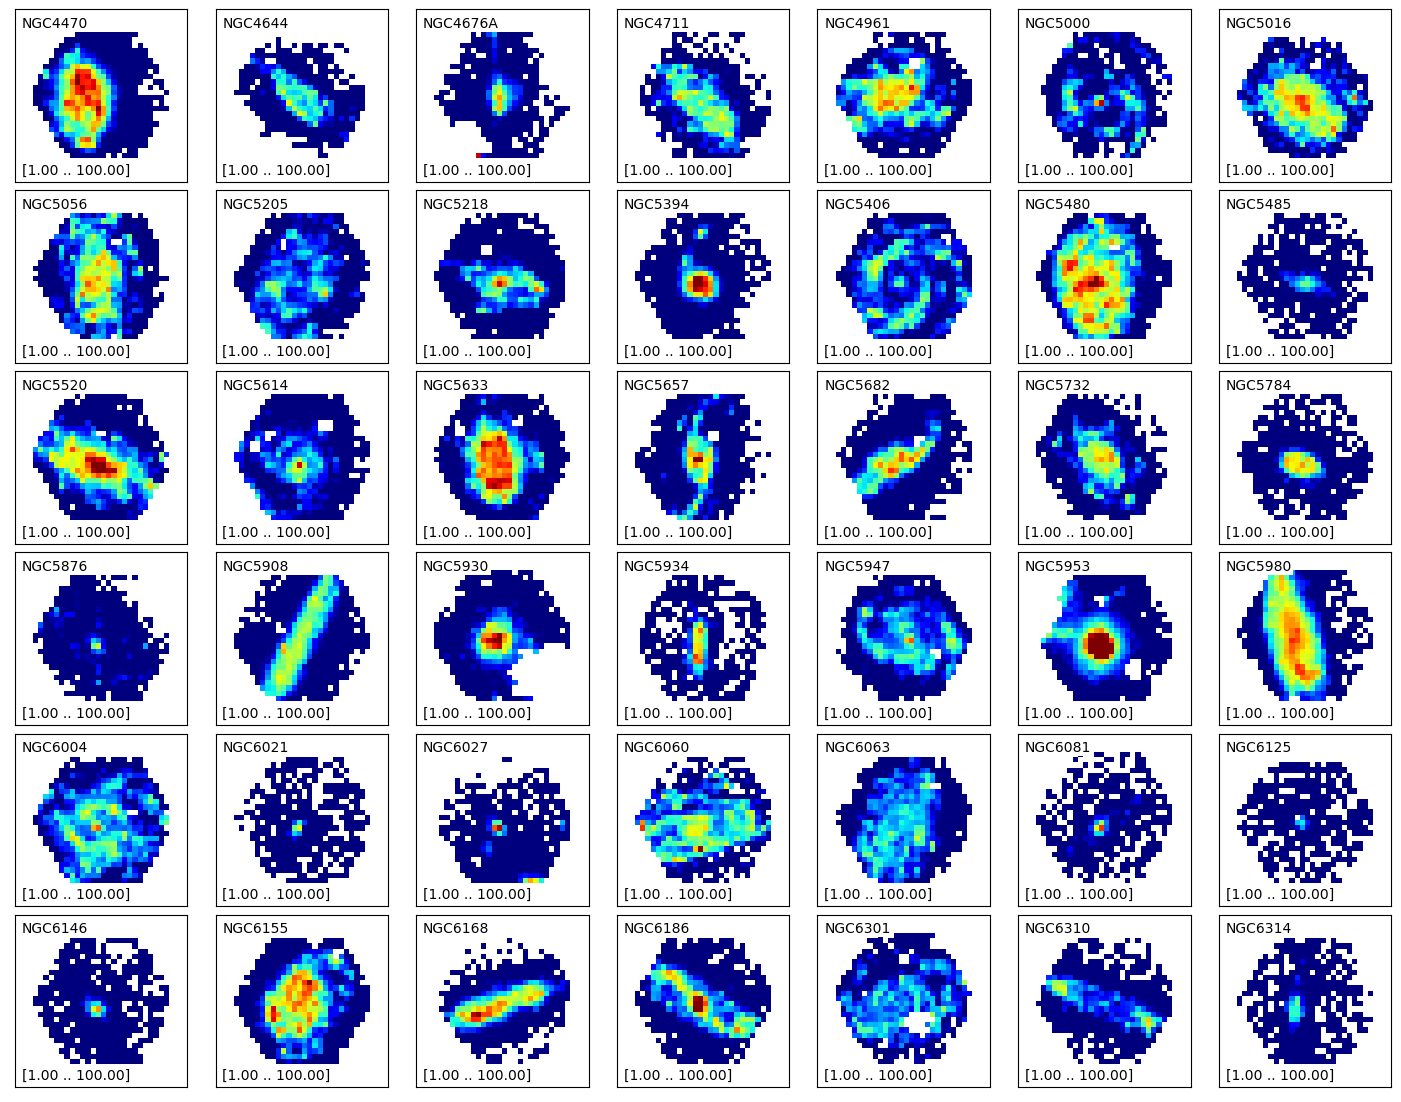

Plotting NGC6361 to UGC10710


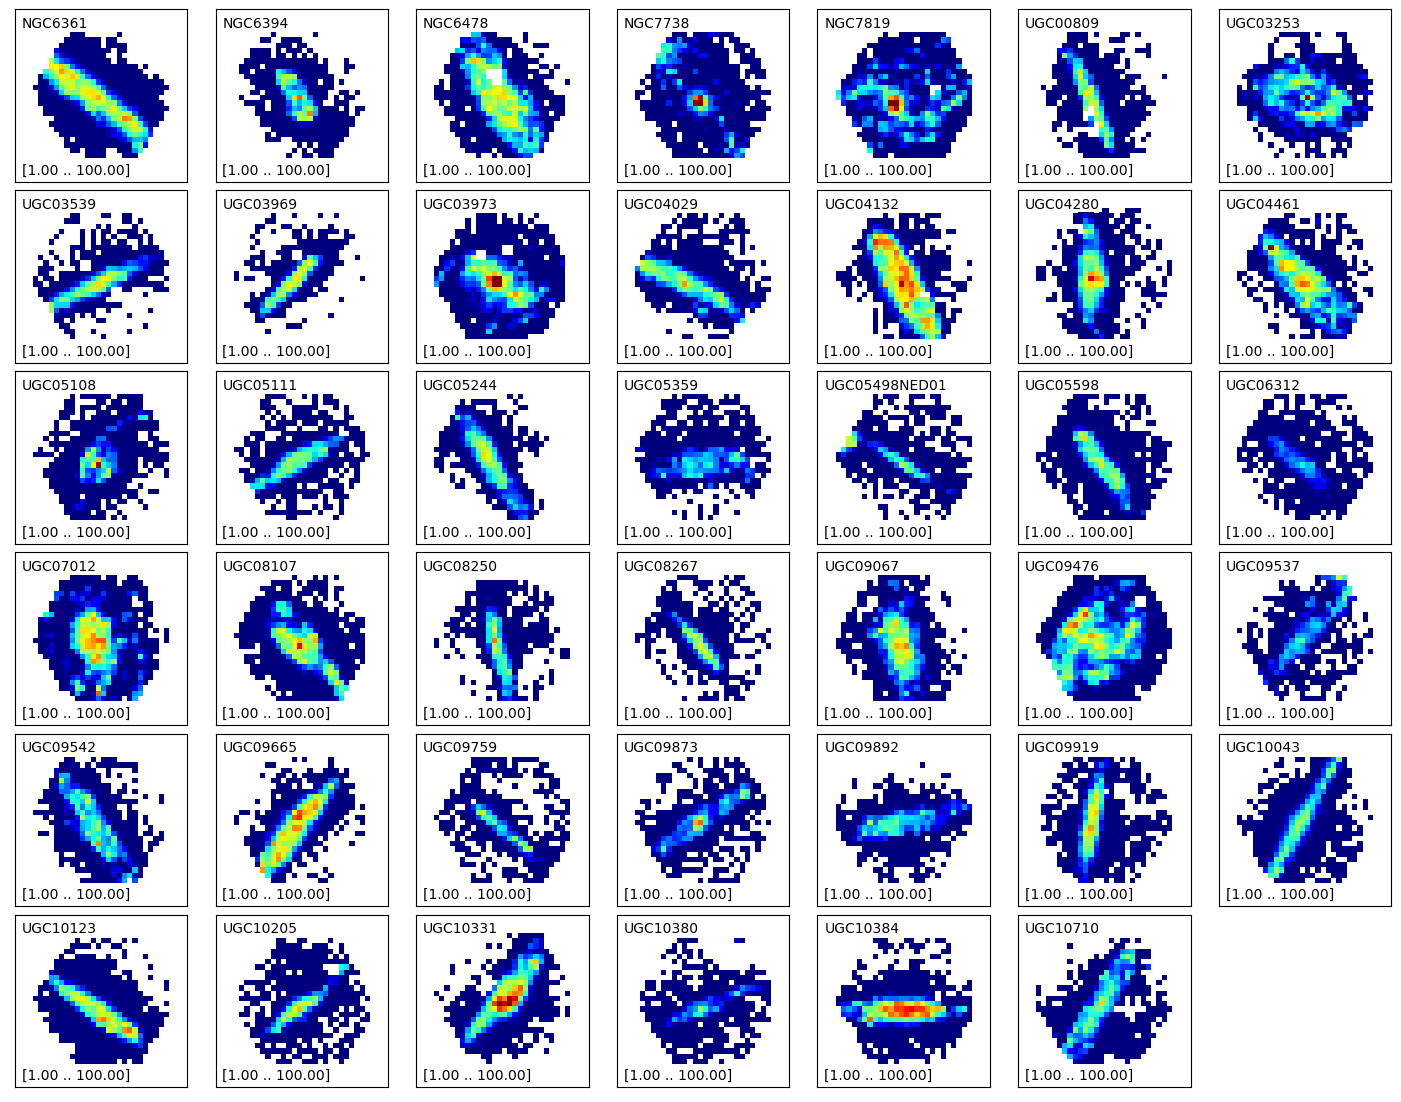

In [9]:
gridplot(edgetab=fluxtab, gallist=gallist, columnlist='flux_sigsfr0', plotstyle='image',
         xrange=[-4,29], yrange=[-5,28], norm=LogNorm(vmin=1, vmax=100), vshow=True)

## SFR map without extinction correction, SNR > 3 cut

Plotting column flux_sigsfr0 for 125 galaxies
Plotting ARP220 to NGC4211NED02


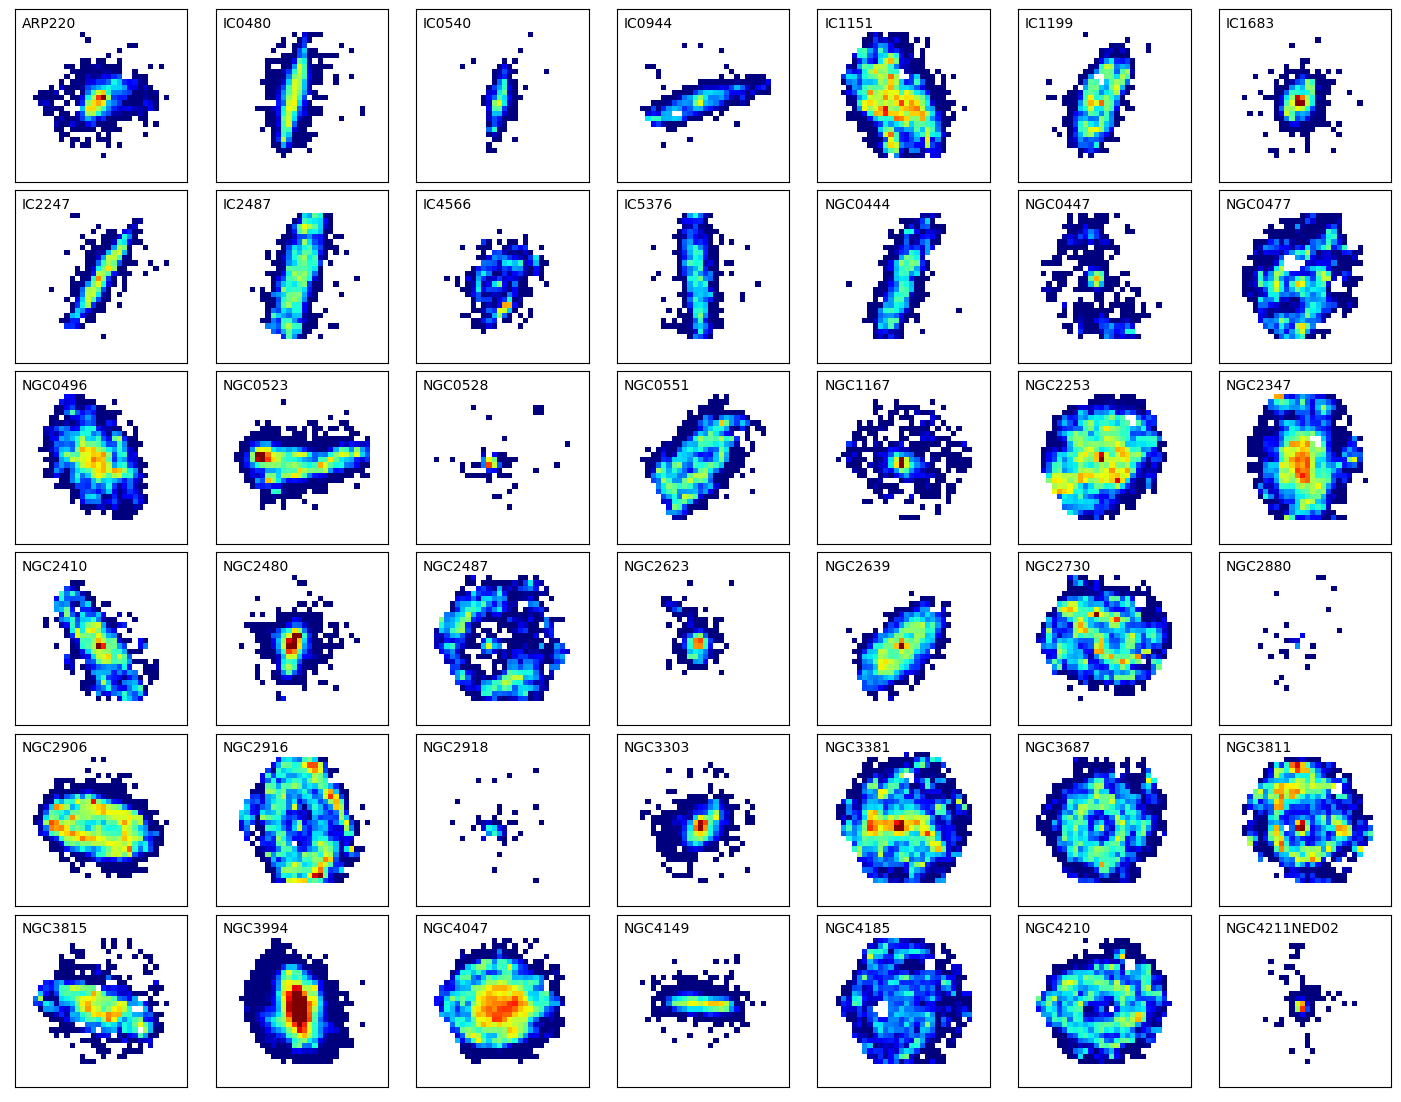

Plotting NGC4470 to NGC6314


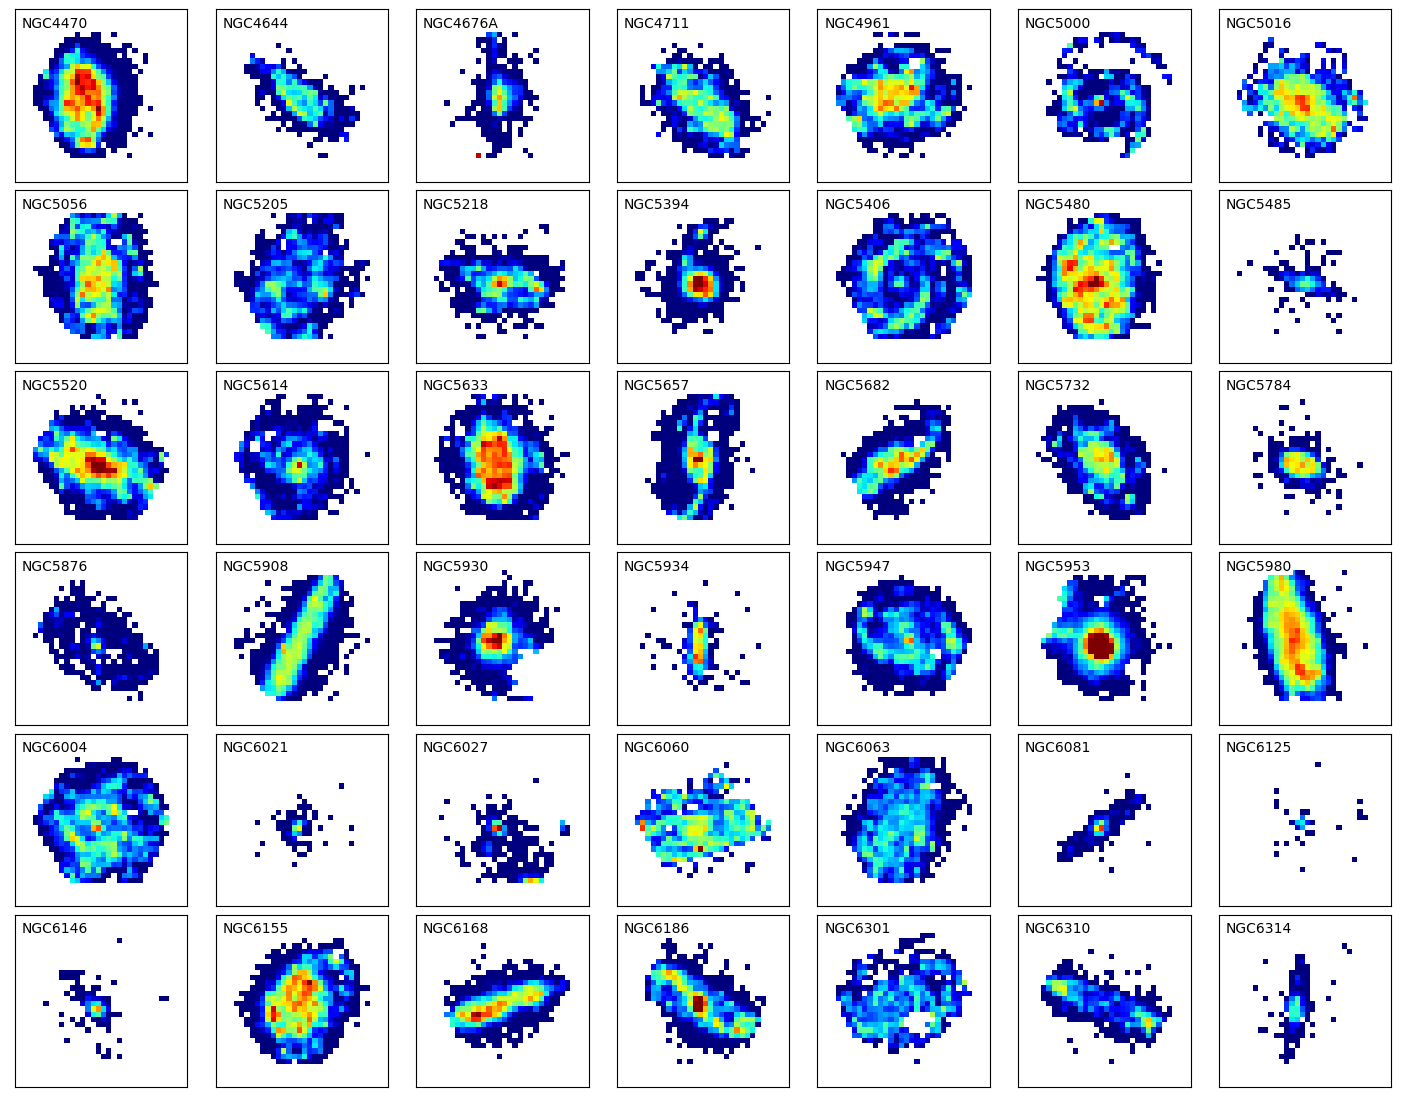

Plotting NGC6361 to UGC10710


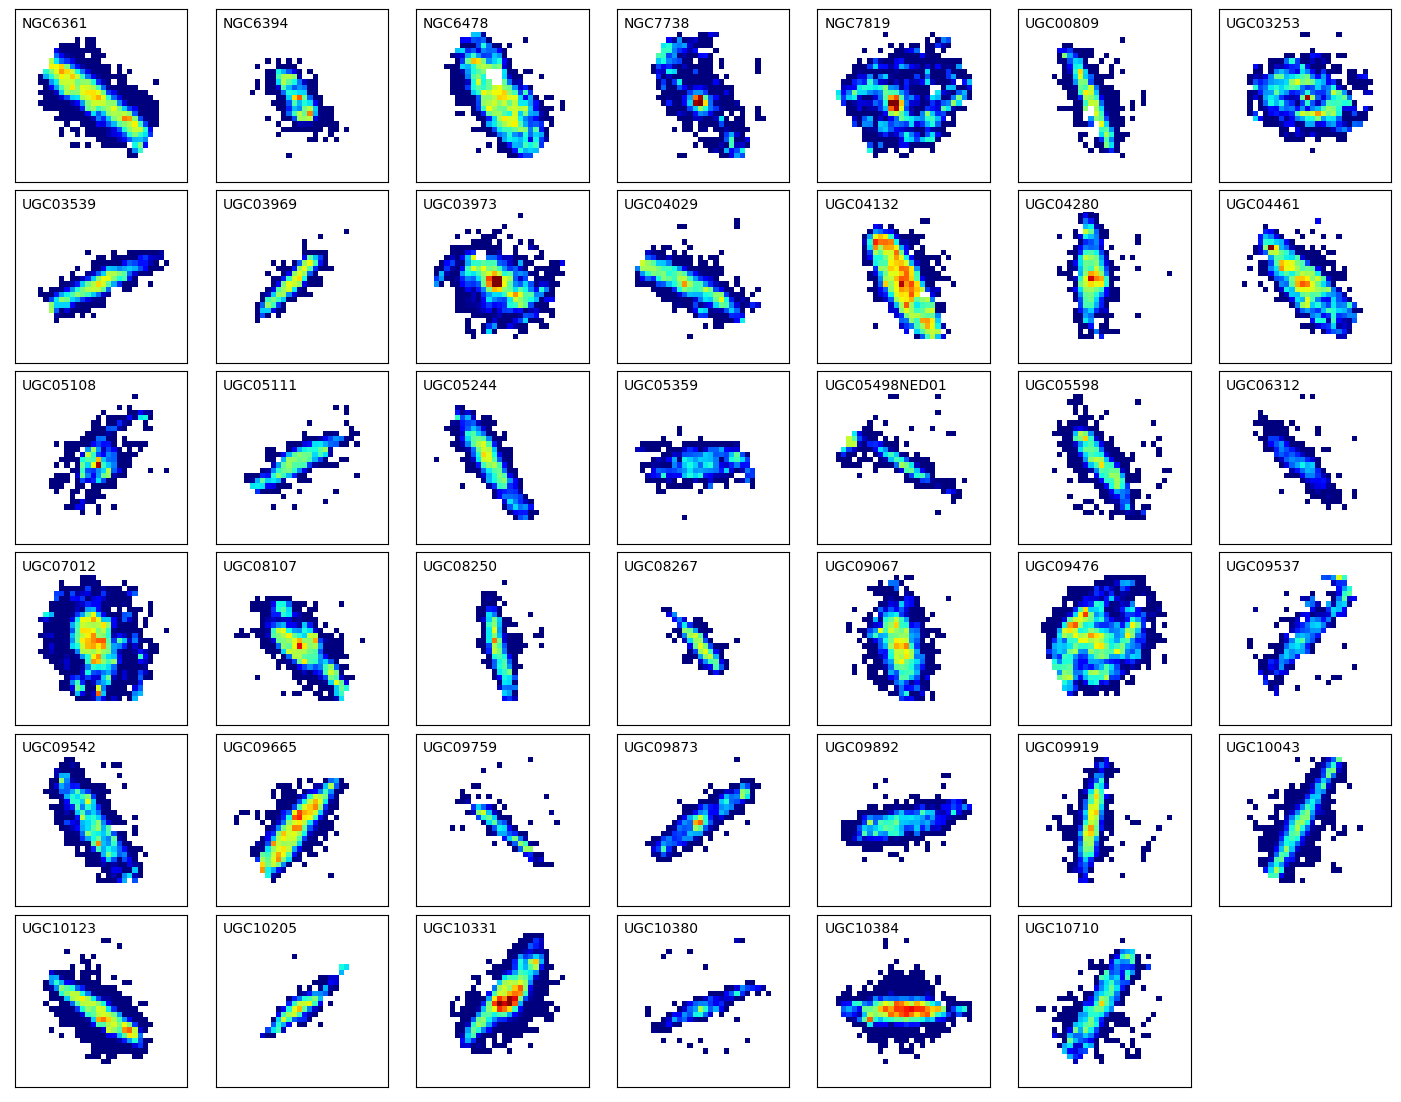

In [10]:
flag = (fluxtab['flux_sigsfr0'] < 3*fluxtab['e_flux_sigsfr0'])
gridplot(edgetab=fluxtab, gallist=gallist, columnlist='flux_sigsfr0', plotstyle='image',
         xrange=[-4,29], yrange=[-5,28], norm=LogNorm(vmin=1, vmax=100), blank=flag)

## Stellar surface density map without extinction correction

Plotting column sigstar for 125 galaxies
Plotting ARP220 to NGC4211NED02


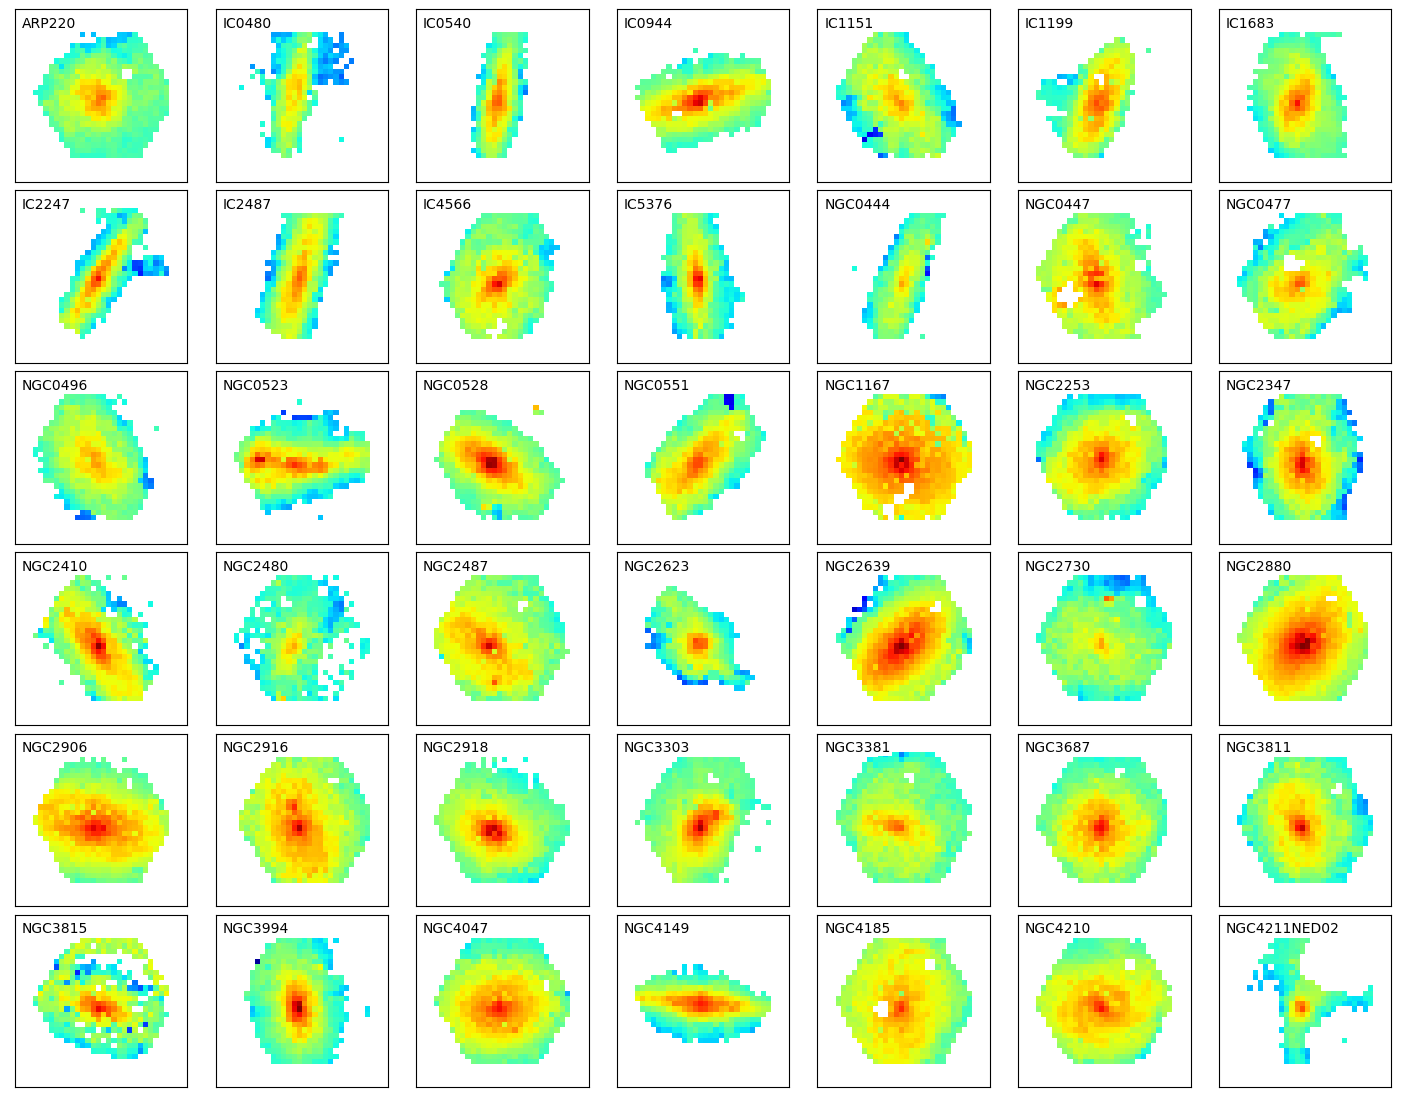

Plotting NGC4470 to NGC6314


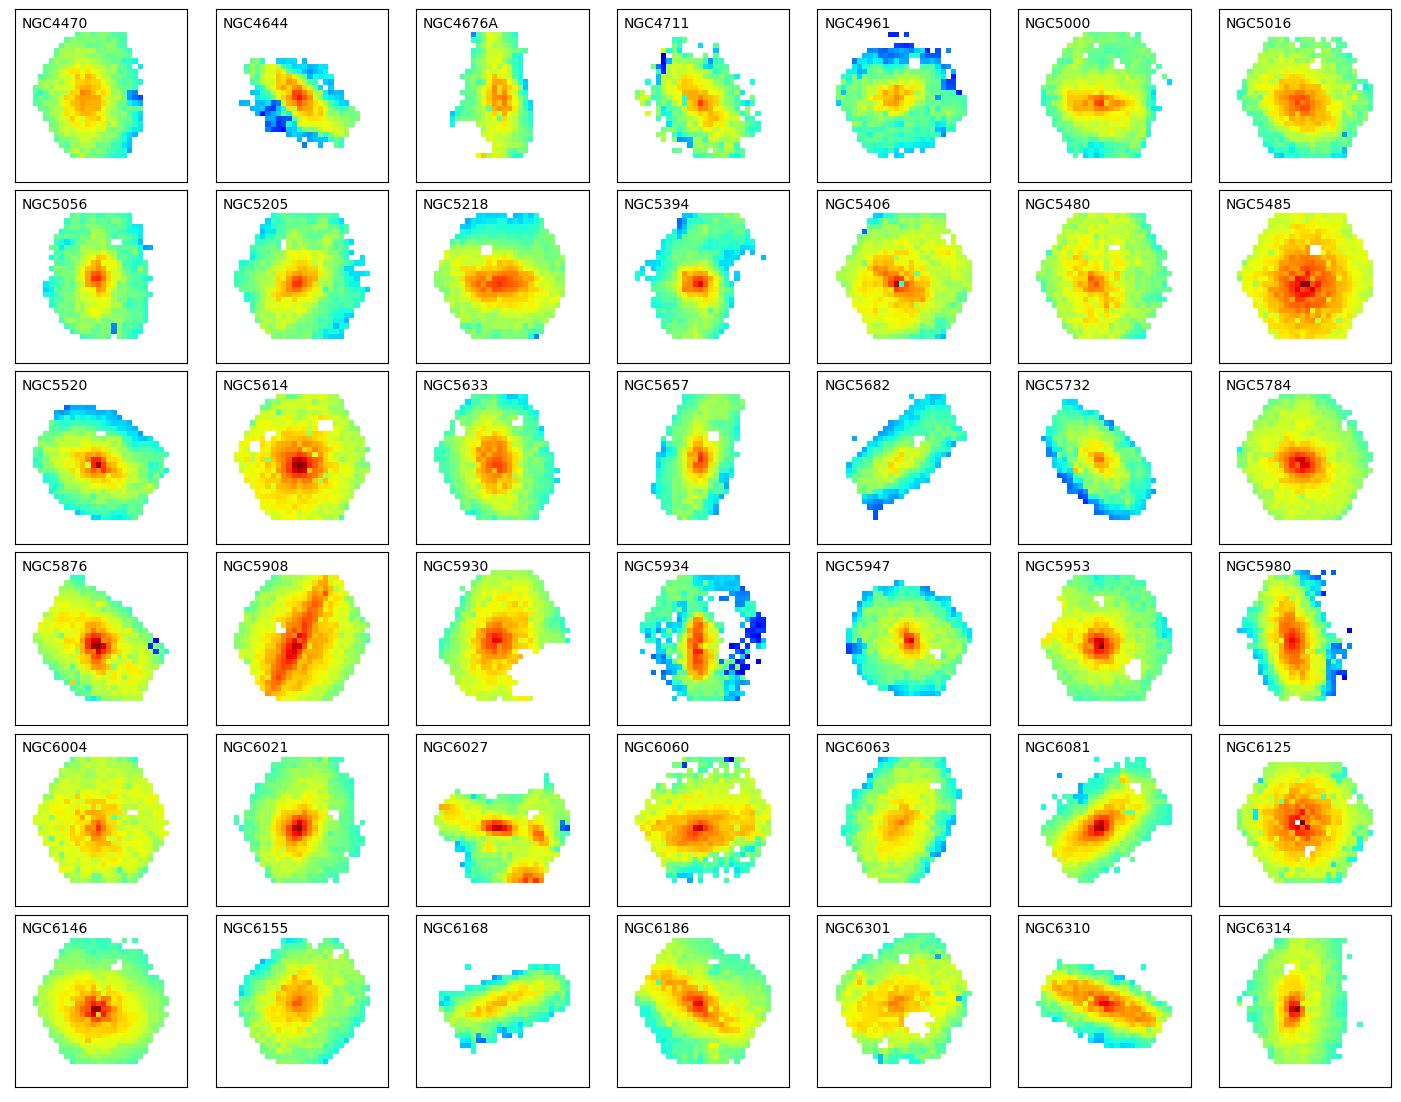

Plotting NGC6361 to UGC10710


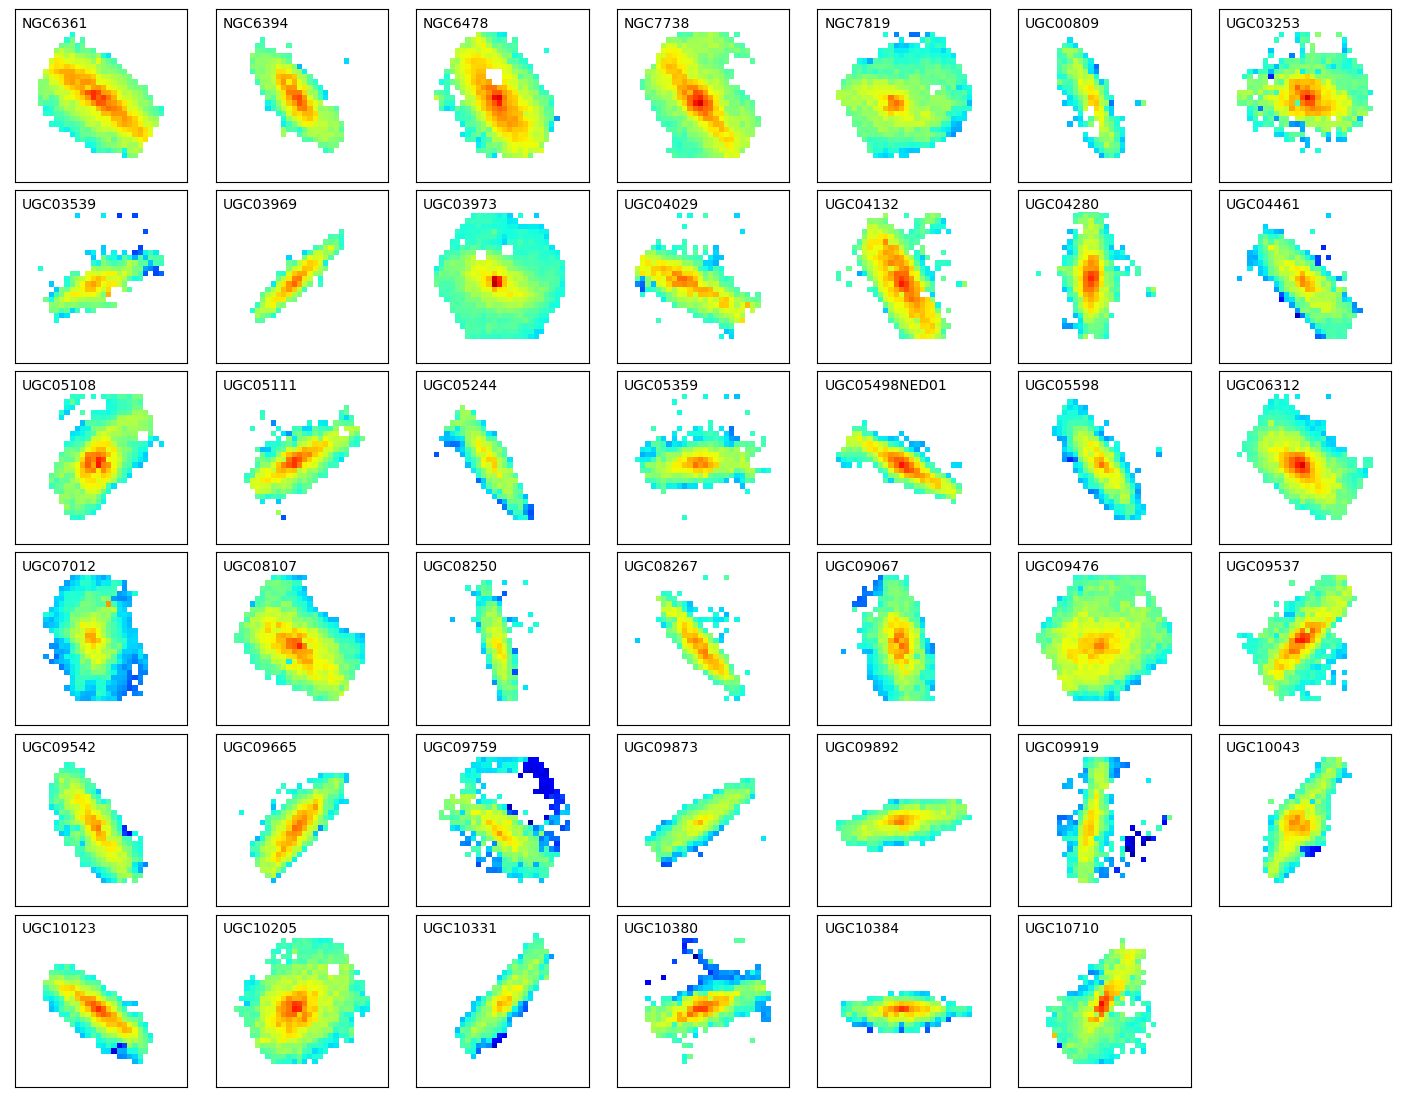

In [11]:
gridplot(edgetab=fluxtab, gallist=gallist, columnlist='sigstar', plotstyle='image',
         xrange=[-4,29], yrange=[-5,28], norm=LogNorm(vmin=0.1, vmax=10000))

## Specific SFR map

Plotting column specSFR for 125 galaxies
Plotting ARP220 to NGC4211NED02


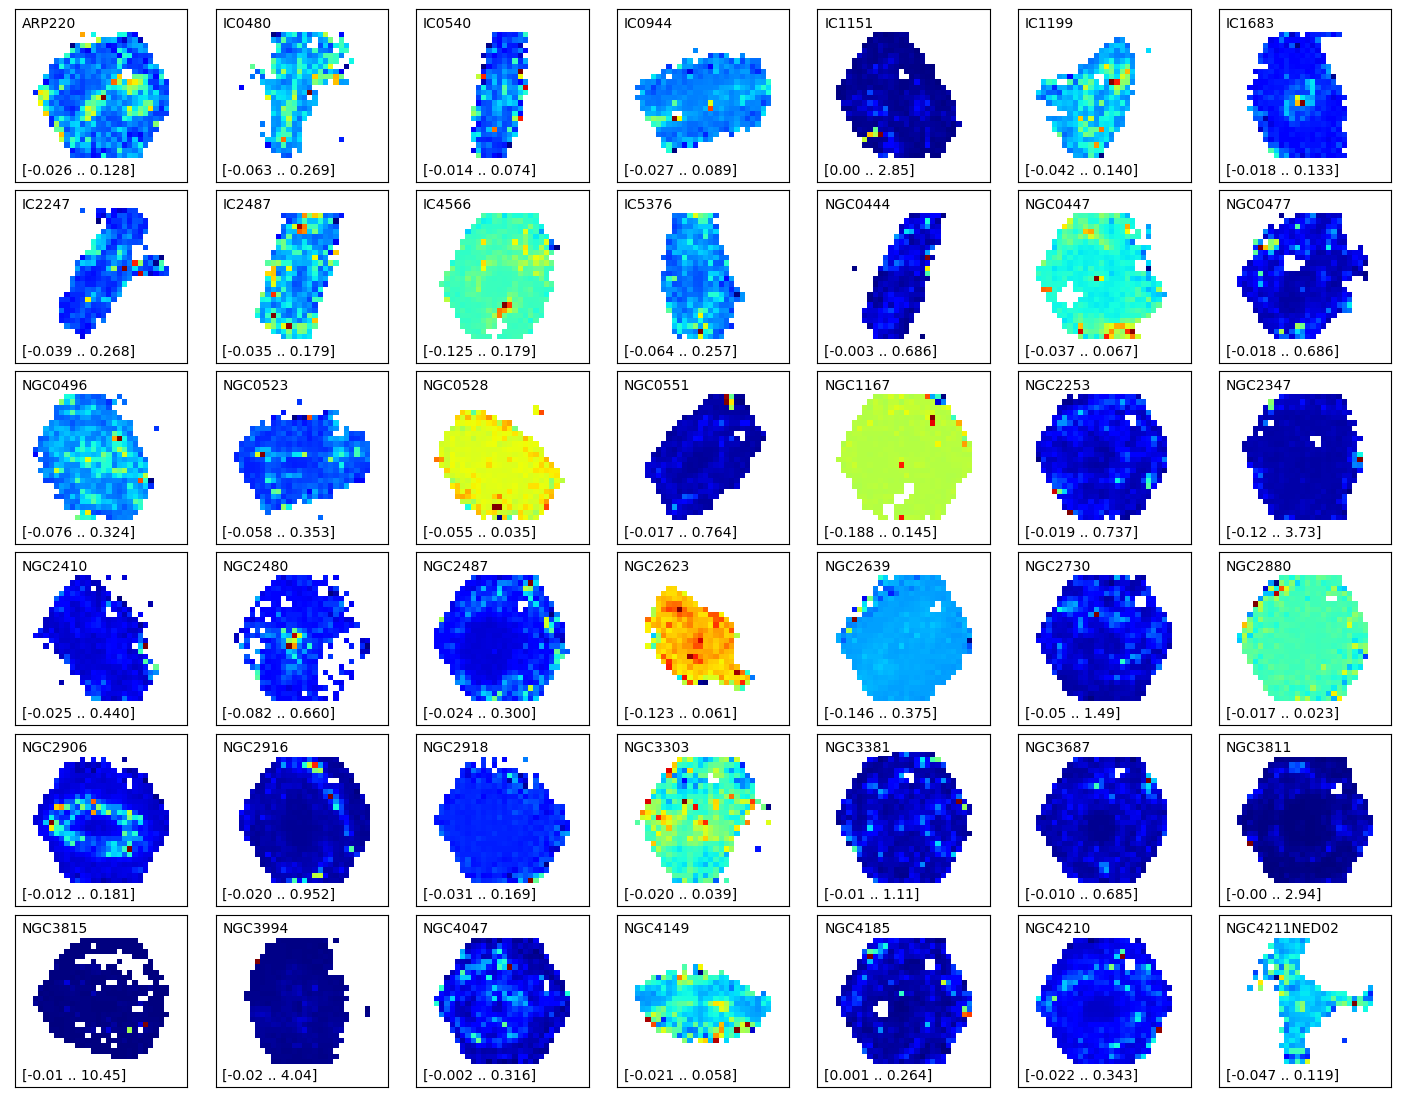

Plotting NGC4470 to NGC6314


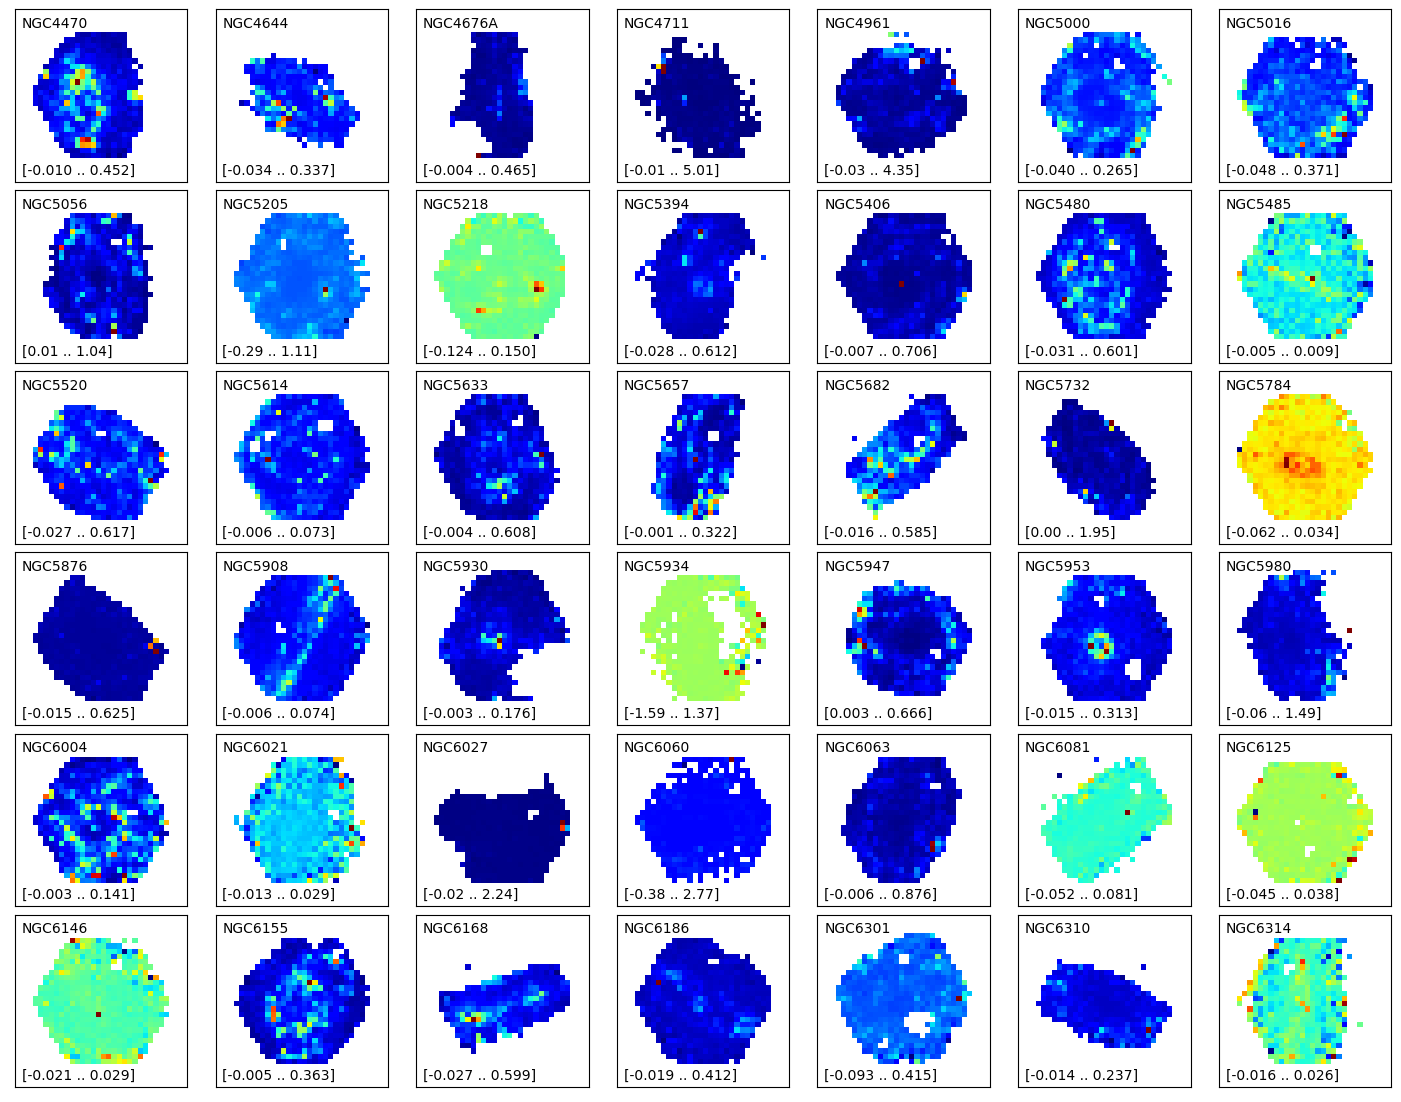

Plotting NGC6361 to UGC10710


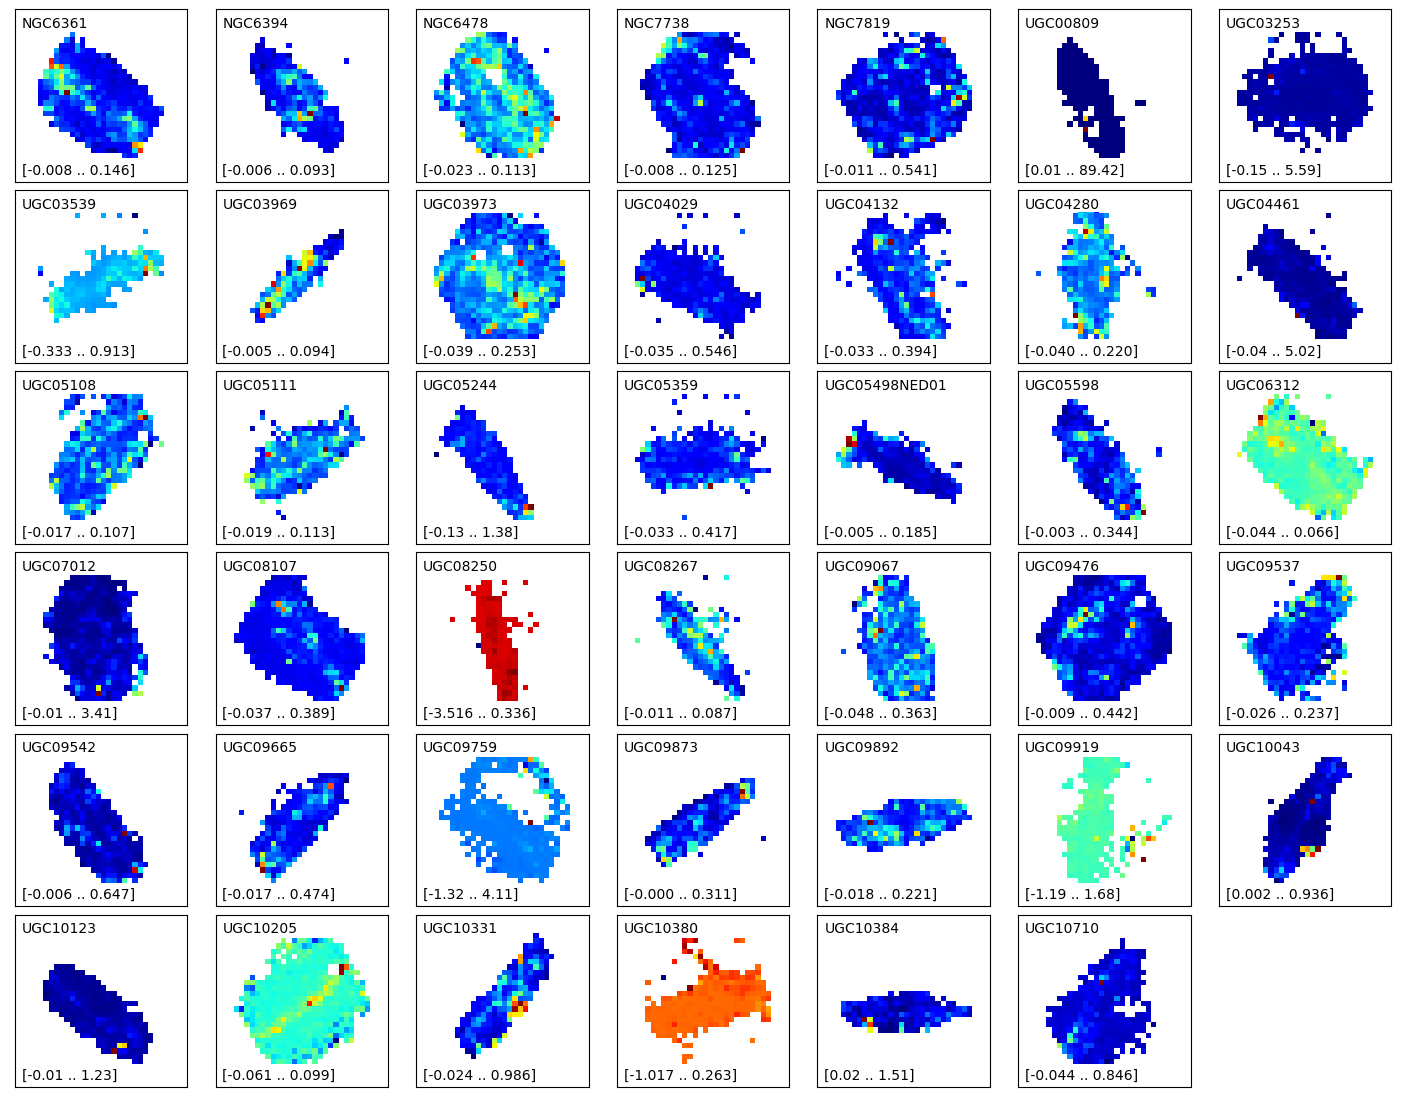

In [12]:
# vmin and vmax in Gyr^{-1}
gridplot(edgetab=fluxtab, gallist=gallist, columnlist='specSFR', plotstyle='image', 
         xrange=[-4,29], yrange=[-5,28], vshow=True)